In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
file_path = "cleaned_road_accident.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.describe()  # Summary statistics
df.head()  # Show first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


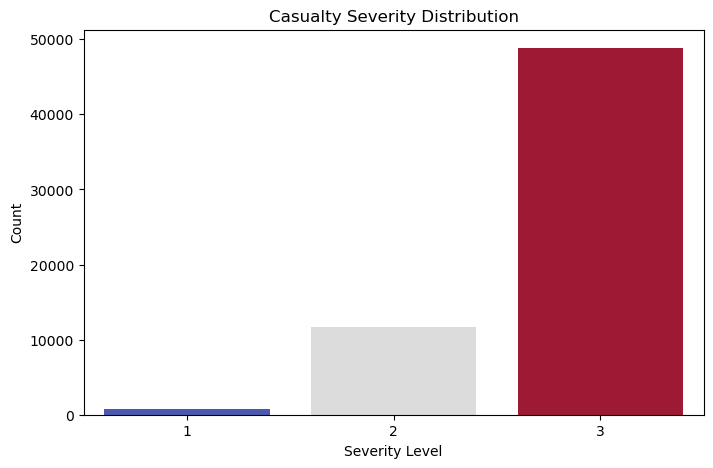

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x="casualty_severity", data=df, hue="casualty_severity", palette="coolwarm", legend=False)
plt.title("Casualty Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()


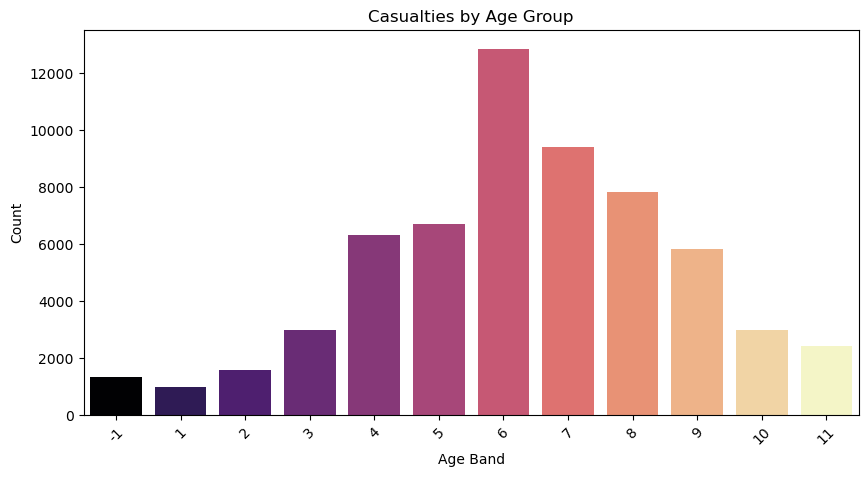

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x="age_band_of_casualty", data=df, hue="age_band_of_casualty", palette="magma", legend=False)
plt.title("Casualties by Age Group")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


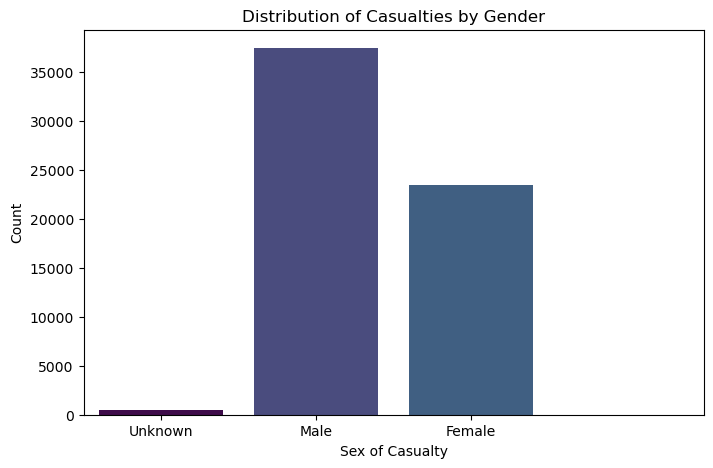

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x="sex_of_casualty", data=df, hue="sex_of_casualty", palette="viridis", legend=False)
plt.title("Distribution of Casualties by Gender")
plt.xlabel("Sex of Casualty")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Unknown", "Male", "Female"])
plt.show()


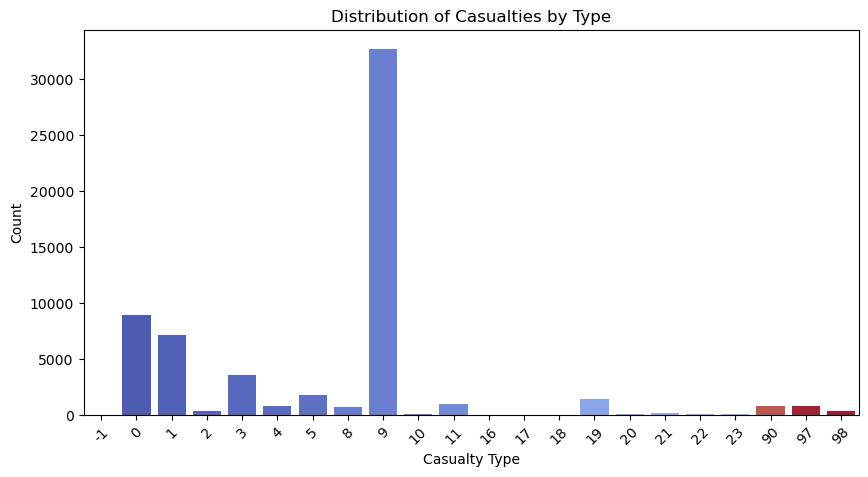

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x="casualty_type", data=df, hue="casualty_type", palette="coolwarm", legend=False)
plt.title("Distribution of Casualties by Type")
plt.xlabel("Casualty Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


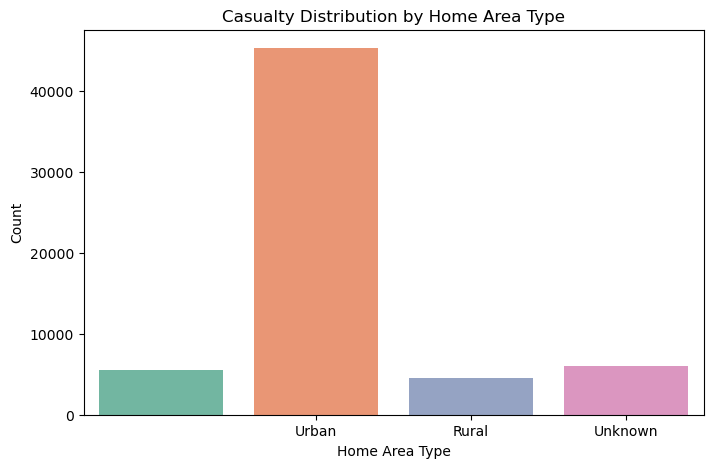

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x="casualty_home_area_type", data=df, hue="casualty_home_area_type", palette="Set2", legend=False)
plt.title("Casualty Distribution by Home Area Type")
plt.xlabel("Home Area Type")
plt.ylabel("Count")
plt.xticks(ticks=[1, 2, 3], labels=["Urban", "Rural", "Unknown"])  # Adjust labels if needed
plt.show()



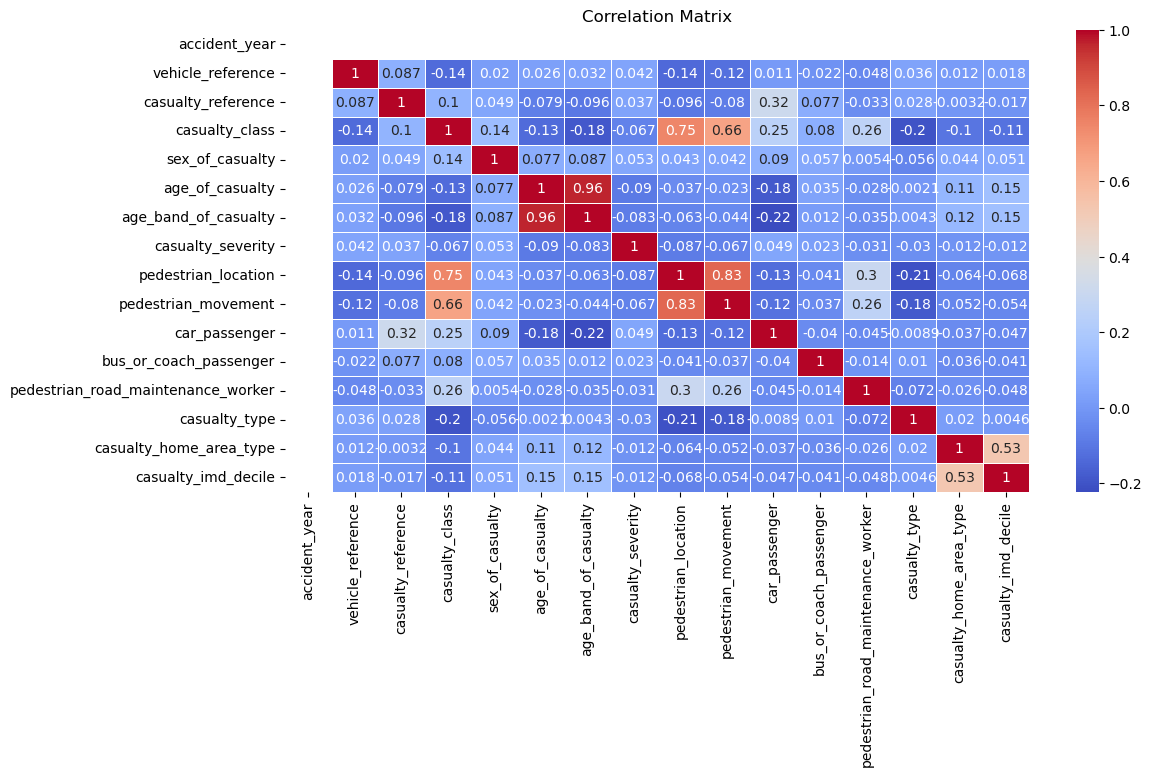

In [16]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


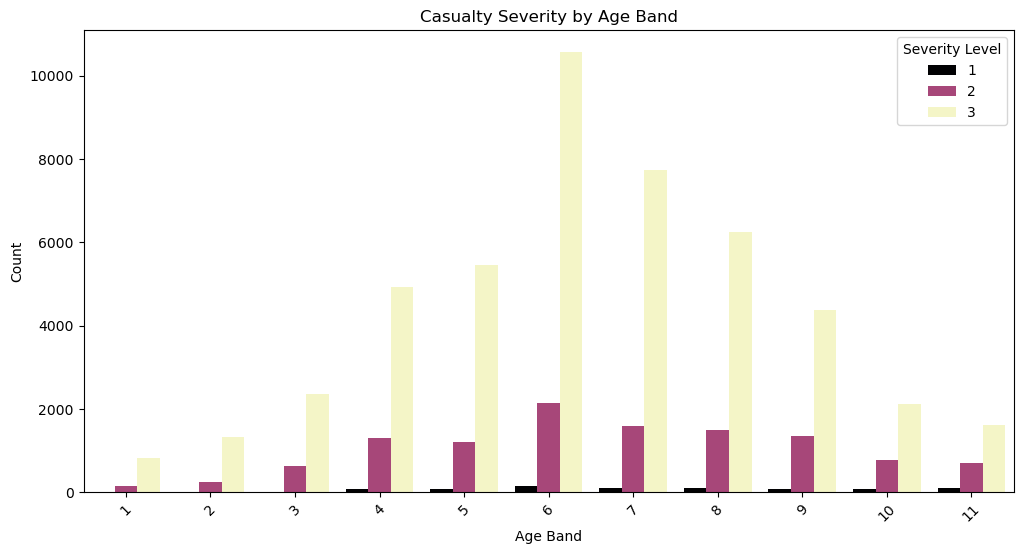

In [18]:
plt.figure(figsize=(12, 6))
df = df[df["age_band_of_casualty"] >= 0]  # Remove invalid entries
sns.countplot(x="age_band_of_casualty", data=df, hue="casualty_severity", palette="magma")
plt.title("Casualty Severity by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.legend(title="Severity Level")
plt.xticks(rotation=45)
plt.show()


In [19]:
high_risk = df.groupby("age_band_of_casualty")["casualty_severity"].mean().sort_values(ascending=False)
print(high_risk)


age_band_of_casualty
2     2.844444
1     2.822467
7     2.811949
6     2.809043
5     2.798811
3     2.784255
8     2.784111
4     2.768331
9     2.735878
10    2.684105
11    2.622031
Name: casualty_severity, dtype: float64


In [20]:
age_fatality = df[df["casualty_severity"] == 1].groupby("age_band_of_casualty")["casualty_severity"].count() / df.groupby("age_band_of_casualty")["casualty_severity"].count()
age_fatality = age_fatality.fillna(0) * 100  # Convert to percentage
print(age_fatality.sort_values(ascending=False))


age_band_of_casualty
11    4.422604
10    2.649229
9     1.540568
4     1.216814
8     1.211426
6     1.188626
5     1.054978
7     0.999256
1     0.902708
3     0.368509
2     0.000000
Name: casualty_severity, dtype: float64


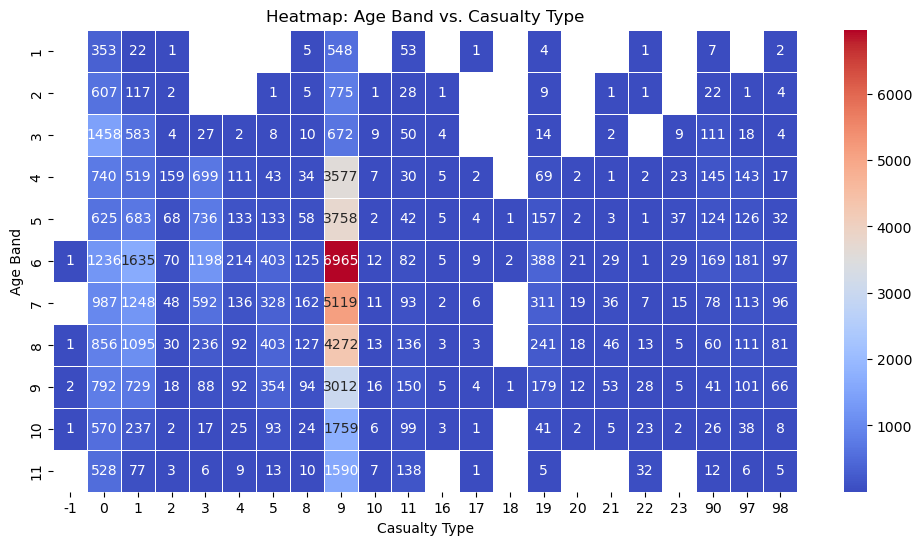

In [21]:
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(index="age_band_of_casualty", columns="casualty_type", values="casualty_severity", aggfunc="count")

sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap: Age Band vs. Casualty Type")
plt.xlabel("Casualty Type")
plt.ylabel("Age Band")
plt.show()
